In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tit=sns.load_dataset('titanic')


In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
tit.head() #вивела перші 5 рядків для перевірки-датасет є

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


3. Перевір типи стовпців. Які з них потребують перетворення?

In [5]:
tit.info()
#Перетворити варто тип стовпців pclass, embarked, embark_town, who, alive, sex на 'category'.
#З огляду на обмежений перелік значень, які представлені по кожному стовпцю та варіативність значень, їх можна віднести до категорій, 
#тому заміна типів саме по цих стовпцях із типу 'object' чи 'int64' на 'category' буде доречною.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
tit['pclass']=tit['pclass'].astype('category')
tit['embarked']=tit['embarked'].astype('category')
tit['embark_town']=tit['embark_town'].astype('category')
tit['who']=tit['who'].astype('category')
tit['alive']=tit['alive'].astype('category')
tit['sex']=tit['sex'].astype('category')

In [7]:
tit.info() #Перевірка оновлених типів

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(8), float64(2), int64(3)
memory usage: 44.9 KB


In [8]:
tit.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.0,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,491.0,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,NaN,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,NaN,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tit['survived'].count()

np.int64(891)

In [10]:
clean_tit=tit.drop_duplicates()

In [11]:
clean_tit['survived'].count()

np.int64(784)

In [12]:
tit['survived'].count()-clean_tit['survived'].count()


np.int64(107)

In [13]:
#Вилучено 107 рядків, які повністю дублюються.

In [14]:
# Створюємо копію DataFrame, щоб працювати без попереджень
clean_tit = clean_tit.copy()

# Створюємо новий стовпець relatives
clean_tit['relatives'] = clean_tit['parch'] + clean_tit['sibsp']

# Видаляємо непотрібні стовпці
clean_tit = clean_tit.drop(columns=['sibsp', 'parch', 'alone'])


In [15]:
clean_tit.info() #Перевірка стовпців

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    category
 2   sex          784 non-null    category
 3   age          678 non-null    float64 
 4   fare         784 non-null    float64 
 5   embarked     782 non-null    category
 6   class        784 non-null    category
 7   who          784 non-null    category
 8   adult_male   784 non-null    bool    
 9   deck         202 non-null    category
 10  embark_town  782 non-null    category
 11  alive        784 non-null    category
 12  relatives    784 non-null    int64   
dtypes: bool(1), category(8), float64(2), int64(2)
memory usage: 38.8 KB


In [16]:
clean_tit['relatives'].value_counts()

relatives
0     446
1     154
2     101
3      28
5      22
4      13
6      12
7       6
10      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Розподіл пасажирів за кількістю родичів на борту')

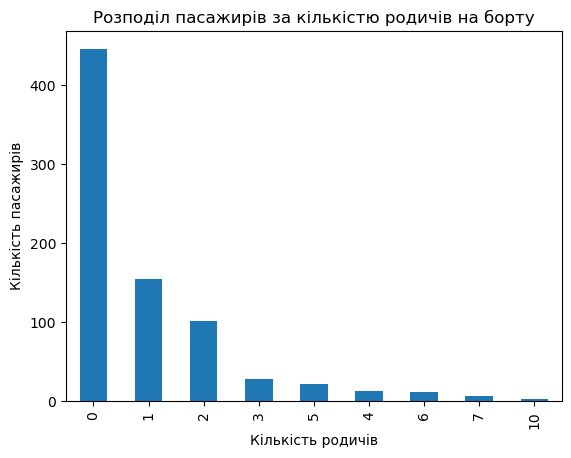

In [17]:
clean_tit['relatives'].value_counts().plot(kind='bar')
plt.xlabel('Кількість родичів')
plt.ylabel('Кількість пасажирів')
plt.title('Розподіл пасажирів за кількістю родичів на борту')
#Найбільше пасажирів продорожує самотньо, 
#далі спостерігаємо, що кількість пасажирів зменшується зі зростанням кількості родичів. 
#Лише 2 пасажири подорожують із 10-ма родичами.

In [18]:
clean_tit['relatives']=clean_tit['relatives'].apply(lambda x: "above 5" if x>5 else x)

In [19]:
clean_tit['relatives'].value_counts()#Перевірка виконання умови "above 5"

relatives
0          446
1          154
2          101
3           28
5           22
above 5     20
4           13
Name: count, dtype: int64

In [20]:
clean_tit['relatives'] = pd.Categorical(clean_tit['relatives'], ordered=True)
#pd.Categorical автоматично поставив 'above 5' в кінець, оскільки це єдине текстове значення,
#тому явно задавати позицію в даному випадку не потрібно

In [21]:
clean_tit['relatives'].value_counts(sort=False)

relatives
0          446
1          154
2          101
3           28
4           13
5           22
above 5     20
Name: count, dtype: int64

In [22]:
clean_tit.info()#Стовпець 'relatives' тепер має тип 'category'

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    category
 2   sex          784 non-null    category
 3   age          678 non-null    float64 
 4   fare         784 non-null    float64 
 5   embarked     782 non-null    category
 6   class        784 non-null    category
 7   who          784 non-null    category
 8   adult_male   784 non-null    bool    
 9   deck         202 non-null    category
 10  embark_town  782 non-null    category
 11  alive        784 non-null    category
 12  relatives    784 non-null    category
dtypes: bool(1), category(9), float64(2), int64(1)
memory usage: 33.7 KB


In [23]:
age_median=clean_tit['age'].median() #знайшли медіану стовпця 'age' - 28.25
clean_tit['age']=clean_tit['age'].fillna(age_median)

In [24]:
clean_tit['age'].nunique()#Перевірка кількості унікальних значень

89

In [25]:
clean_tit['age'].value_counts()

age
28.25    106
24.00     29
18.00     25
22.00     24
19.00     23
        ... 
24.50      1
0.67       1
0.42       1
34.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [26]:
def age_dist(age):
    if age<14: return 'до 14 р.'
    elif 14<=age<=34: return '14-34 р.'
    elif 35<=age<=59: return '35-59 р.'
    elif age>=60: return 'старше 60 р.'
    else: return 'Unknown'
clean_tit['age_range']=clean_tit['age'].apply(age_dist)

In [27]:
clean_tit['age_range'].value_counts()

age_range
14-34 р.        482
35-59 р.        205
до 14 р.         70
старше 60 р.     26
Unknown           1
Name: count, dtype: int64

In [28]:
clean_tit.head()

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,relatives,age_range
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,1,14-34 р.
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,1,35-59 р.
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,0,14-34 р.
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,1,35-59 р.
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,0,35-59 р.


In [29]:
clean_tit['alive'] = titanic['alive']#проміжний рядок для відновлення оригінальних значень стовпця 'alive' з оригінального датасету
#після помилки застосування astype

In [30]:
clean_tit['alive'] = clean_tit['alive'] == 'yes'

In [31]:
clean_tit['alive'].dtype

dtype('bool')

In [32]:
clean_tit['alive'].value_counts()

alive
False    461
True     323
Name: count, dtype: int64

In [33]:
total=clean_tit[clean_tit['age_range'] != 'Unknown'].groupby('age_range')['alive'].count()
survived=clean_tit[clean_tit['age_range'] != 'Unknown'].groupby('age_range')['alive'].sum()
#Прибрано категорію Unknown для чистоти аналізу відносного показника смертності за віковою категорією
related=np.round((((total-survived)/total)*100),2)
print(related)

age_range
14-34 р.        60.79
35-59 р.        58.05
до 14 р.        41.43
старше 60 р.    73.08
Name: alive, dtype: float64


In [34]:
#Найвища смертність спостерігається у віковій групі старше 60 р., за нею по рейтингу йде група 14-34 р., потім пасажири віком 35-49 років. 
#Найнижчий % смертності спостерігаємо у групі віком до 14 р.

In [35]:
all_dead=clean_tit[(clean_tit['alive'] == False) & (clean_tit['age_range'] != 'Unknown')].shape[0]
print(all_dead)


460


In [36]:
dead_in_group=clean_tit[(clean_tit['alive'] == False) & (clean_tit['age_range'] != 'Unknown')].groupby('age_range').size()
print(dead_in_group)

age_range
14-34 р.        293
35-59 р.        119
до 14 р.         29
старше 60 р.     19
dtype: int64


In [37]:
dead_range=np.round((dead_in_group/all_dead)*100,2)
print(dead_range)

age_range
14-34 р.        63.70
35-59 р.        25.87
до 14 р.         6.30
старше 60 р.     4.13
dtype: float64


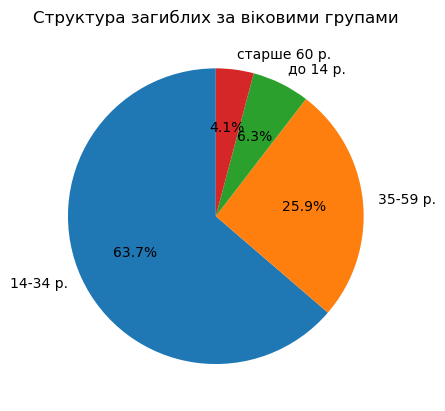

In [39]:
plt.pie(
    dead_in_group / all_dead,
    labels=dead_in_group.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Структура загиблих за віковими групами')
plt.show()

In [ ]:
#Найбільша частка загиблих припадає на вікову групу 13-34 р. Це може бути пов'язано з загальною кількістю пасажирів даного віку, адже саме їх
#було найбільше. Серед молодих людей мало заможніх та впливових, тобто вони могли займати 2-3 клас та дальні каюти, що також
#збільшує ризик не потрапити на рятувальний човен. Також серед них могли бути родичі членів екіпажу, які залишались із рідними.
#Найменша частка припадає на пасажирів віком старше 60 років, що також пов'язане з їх порівняно малою кількістю, а також, що ці пасажири могли займати
#перший клас, ближні каюти, що допомагало їм швидше рятуватись. З невеликим відривом від людей похилого віку йдуть діти до 14 років - за порядком їх
#рятують першими, надають пріорітет, тому частка їх смертності доволі низька.